Name: **Aditya Sankhla**   
Roll No: **12140060**

References:
- Chapter 2 of HOML by  Geron Aurelien
- https://github.com/gagan-iitb/CS550/blob/main/Handouts/Students/Assignment%201/Q1_EDA.ipynb
- https://www.kaggle.com/code/navinmaurya/concrete-data-eda-model-acc-97
- https://almanaratain.com/6-important-factors-that-affect-the-strength-of-concrete/
- https://www.civilengineeringforum.me/effect-of-age-on-concrete-strength/
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

# Phase 1- EDA and Feature Engineering

### Install Python Libraries

First we shall install some python libraries. We shall be using `pandas` and `numpy` for numerical calculation and data manipulation. `matplotlib` and `seaborn` for data visualisation. The latter will be very useful during exploratory data analysis (EDA). `skikit-learn` will be used to make use of the premade and optimised models and `statsmodels` will be required to perform a statistical analysis of the model we have built.

In [145]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\python311\lib\site-packages (0.12.2)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

### Reading the Data

In [147]:
train=pd.read_csv('MaterialStrength_Train.csv')
train_org=train.copy()
test=pd.read_csv('MaterialStrength_test.csv')

In [148]:
print(train.shape)
print(test.shape)

(800, 9)
(230, 9)


In [149]:
train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


On a quick glimpse we can notice, the training data set has 9 columns wherein there are 8 features and 1 target. The target is the `Material Strength`. The columns names are suggestive as well as simple, so there is no need to rename them.

### Check for datatypes of features

Now, lets see what datatype do these features have.

In [150]:
train.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
Material Strength     float64
dtype: object

All the data types are integers or floats which is what we require in linear regression. Thus, there is no need to encode any column values.

### Check for Null values in the data set.
Now, we check for null values, if any.

In [151]:
train.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
Material Strength     0
dtype: int64

Great, we do not have any null values in any columns.

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


### Check for duplicates in the dataset.

In [153]:
print(sum(train.duplicated()))

24


The above shows that there are 24 duplicate rows in our training set. We shall drop them so it does not give an falsely inflated measure of the model.

In [154]:
train=train.drop_duplicates()
print(train.shape)

(776, 9)


Now let us explore the data set further.

In [155]:
train.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,289.562500,65.136985,49.289948,180.386340,5.447680,988.008634,777.434021,50.050258,35.924188
std,103.764355,85.653577,61.897938,22.232729,6.185539,72.079540,82.966435,69.931515,17.165696
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,212.000000,0.000000,0.000000,162.000000,0.000000,938.200000,745.000000,7.000000,22.817500
50%,275.000000,13.600000,0.000000,185.700000,4.550000,977.300000,780.700000,28.000000,34.835000
75%,365.450000,128.125000,118.225000,192.000000,9.900000,1047.000000,834.550000,56.000000,47.710000
max,540.000000,359.400000,174.700000,228.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Check for Zero values

In [156]:
(train["blast_furnace_slag"]==0).sum()

380

In [157]:
(train["fly_ash"]==0).sum()

451

In [158]:
(train["superplasticizer"]==0).sum()

350

This is not surprising as a cursory study on concrete leads to the conclusions that `blast furnace slag`, `fly ash` and `superplasticizer` are additives and are not essential for the formation of concrete. Hence, we can tolerate the large number of 0 values in these columns.

Now let us create various plots to further study the dataset.

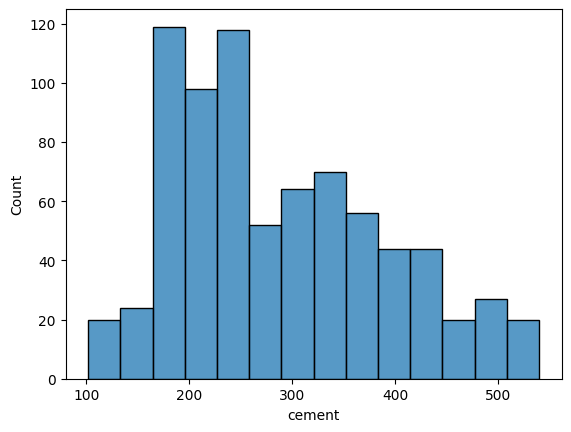

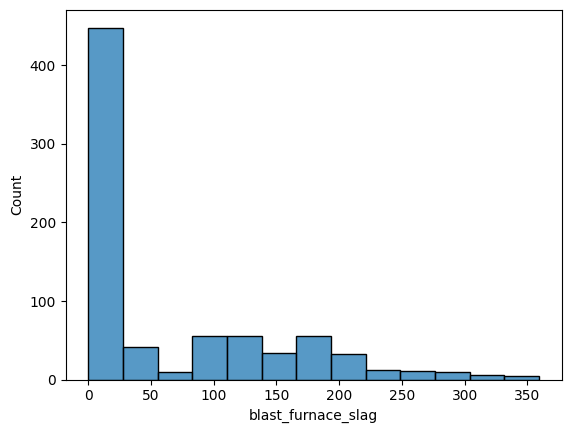

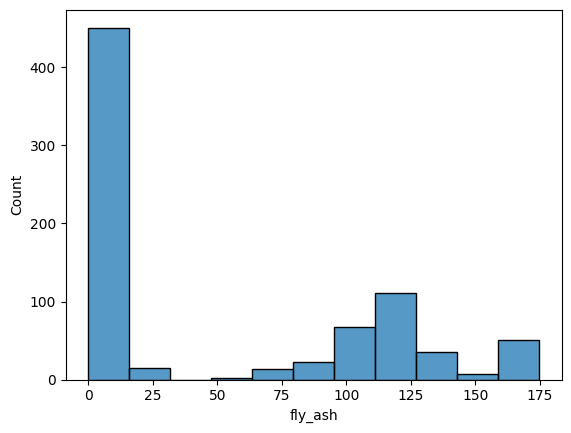

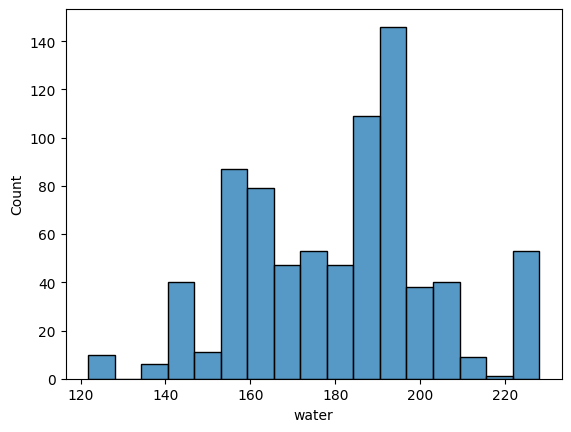

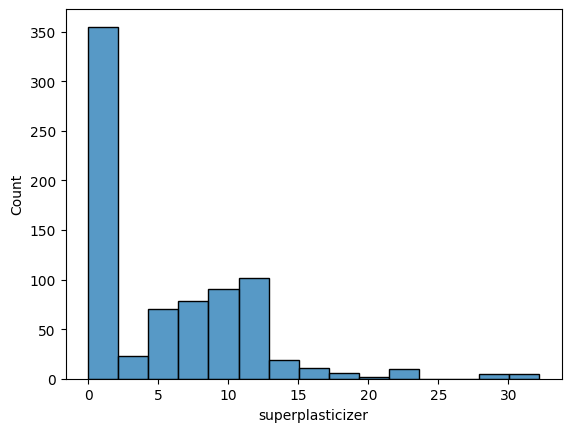

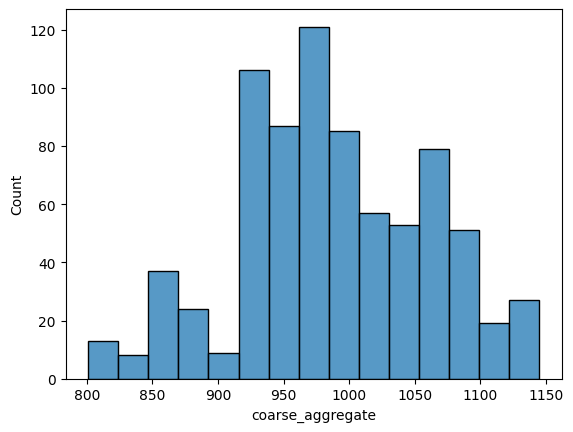

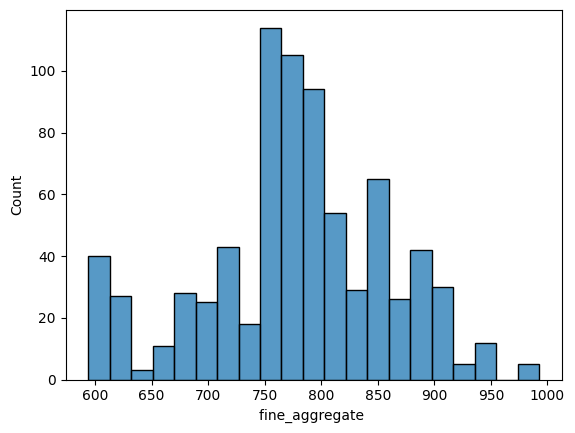

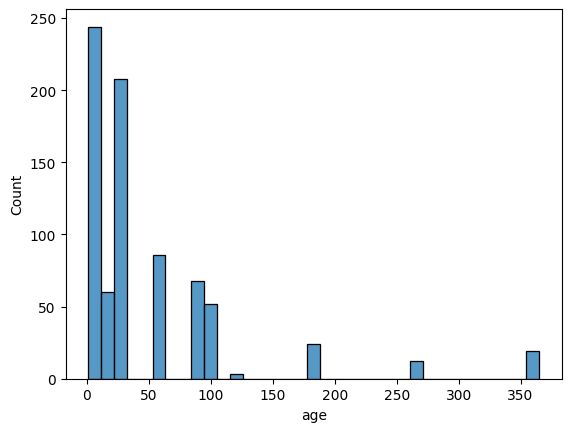

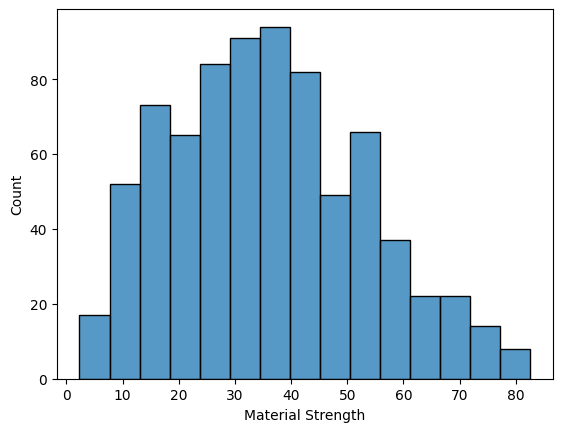

In [159]:
for column in train.columns:
    plt.figure()
    sns.histplot(train[column])

We can notice that the features with non zero values are generally having gaussian distribution and are right skewed except `cement`. Also, the `age` feature is discrete.

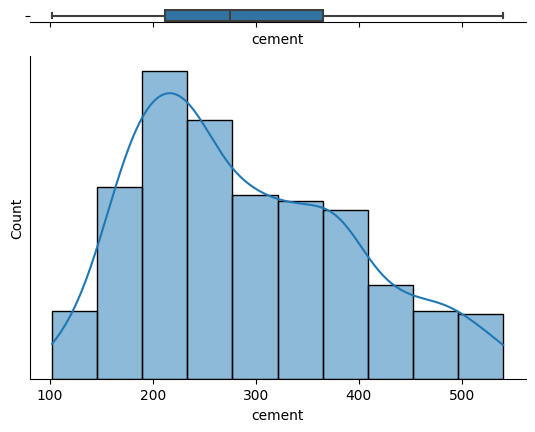

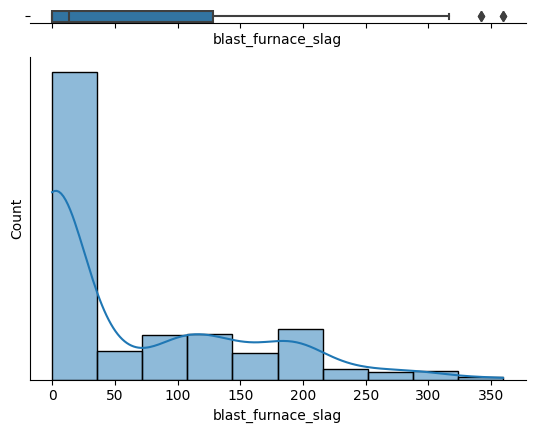

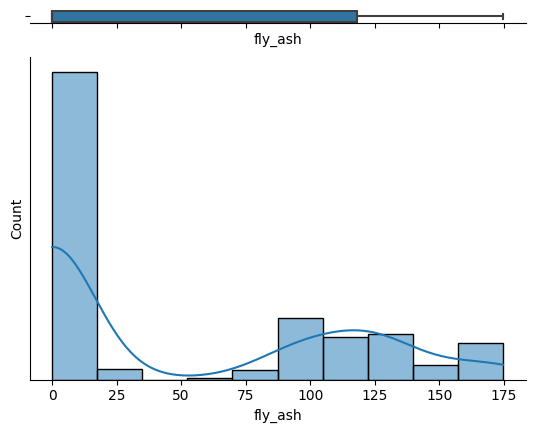

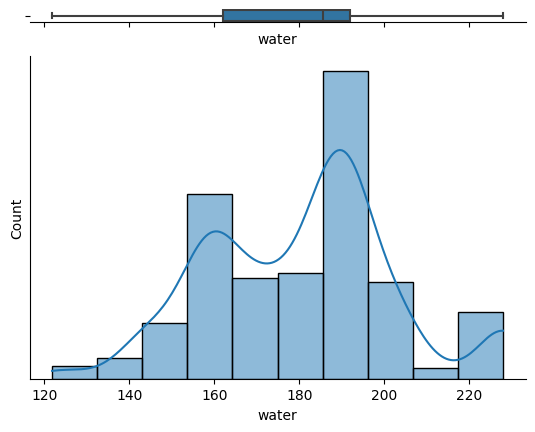

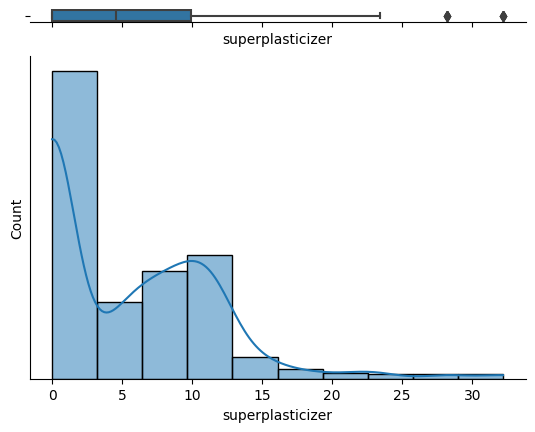

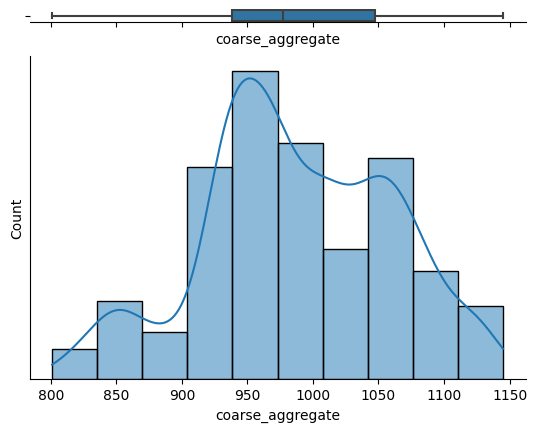

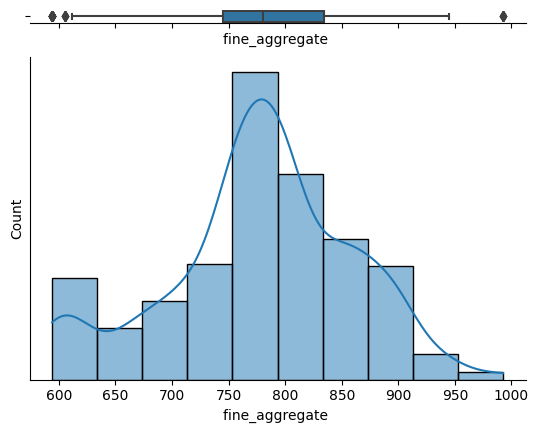

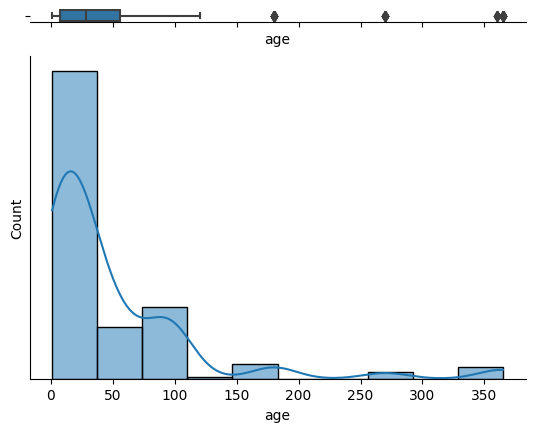

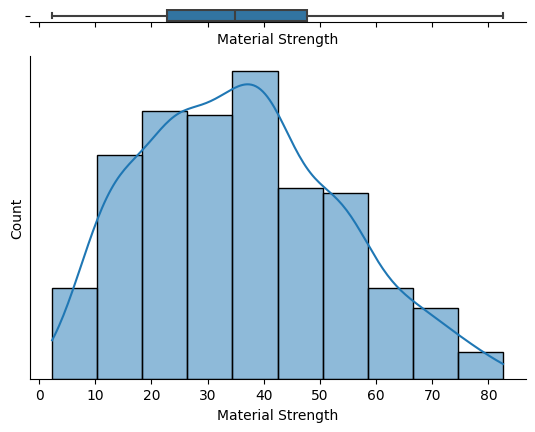

In [160]:
for column in train.columns:
    fig, (boxplot_ax, hist_ax) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.01, .25)})
    
    sns.boxplot(x=train[column], ax=boxplot_ax)
    sns.histplot(x=train[column], bins=10, kde=True, ax=hist_ax)

    hist_ax.set(yticks=[])
    sns.despine(ax=hist_ax)
    sns.despine(ax=boxplot_ax, left=True)

plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


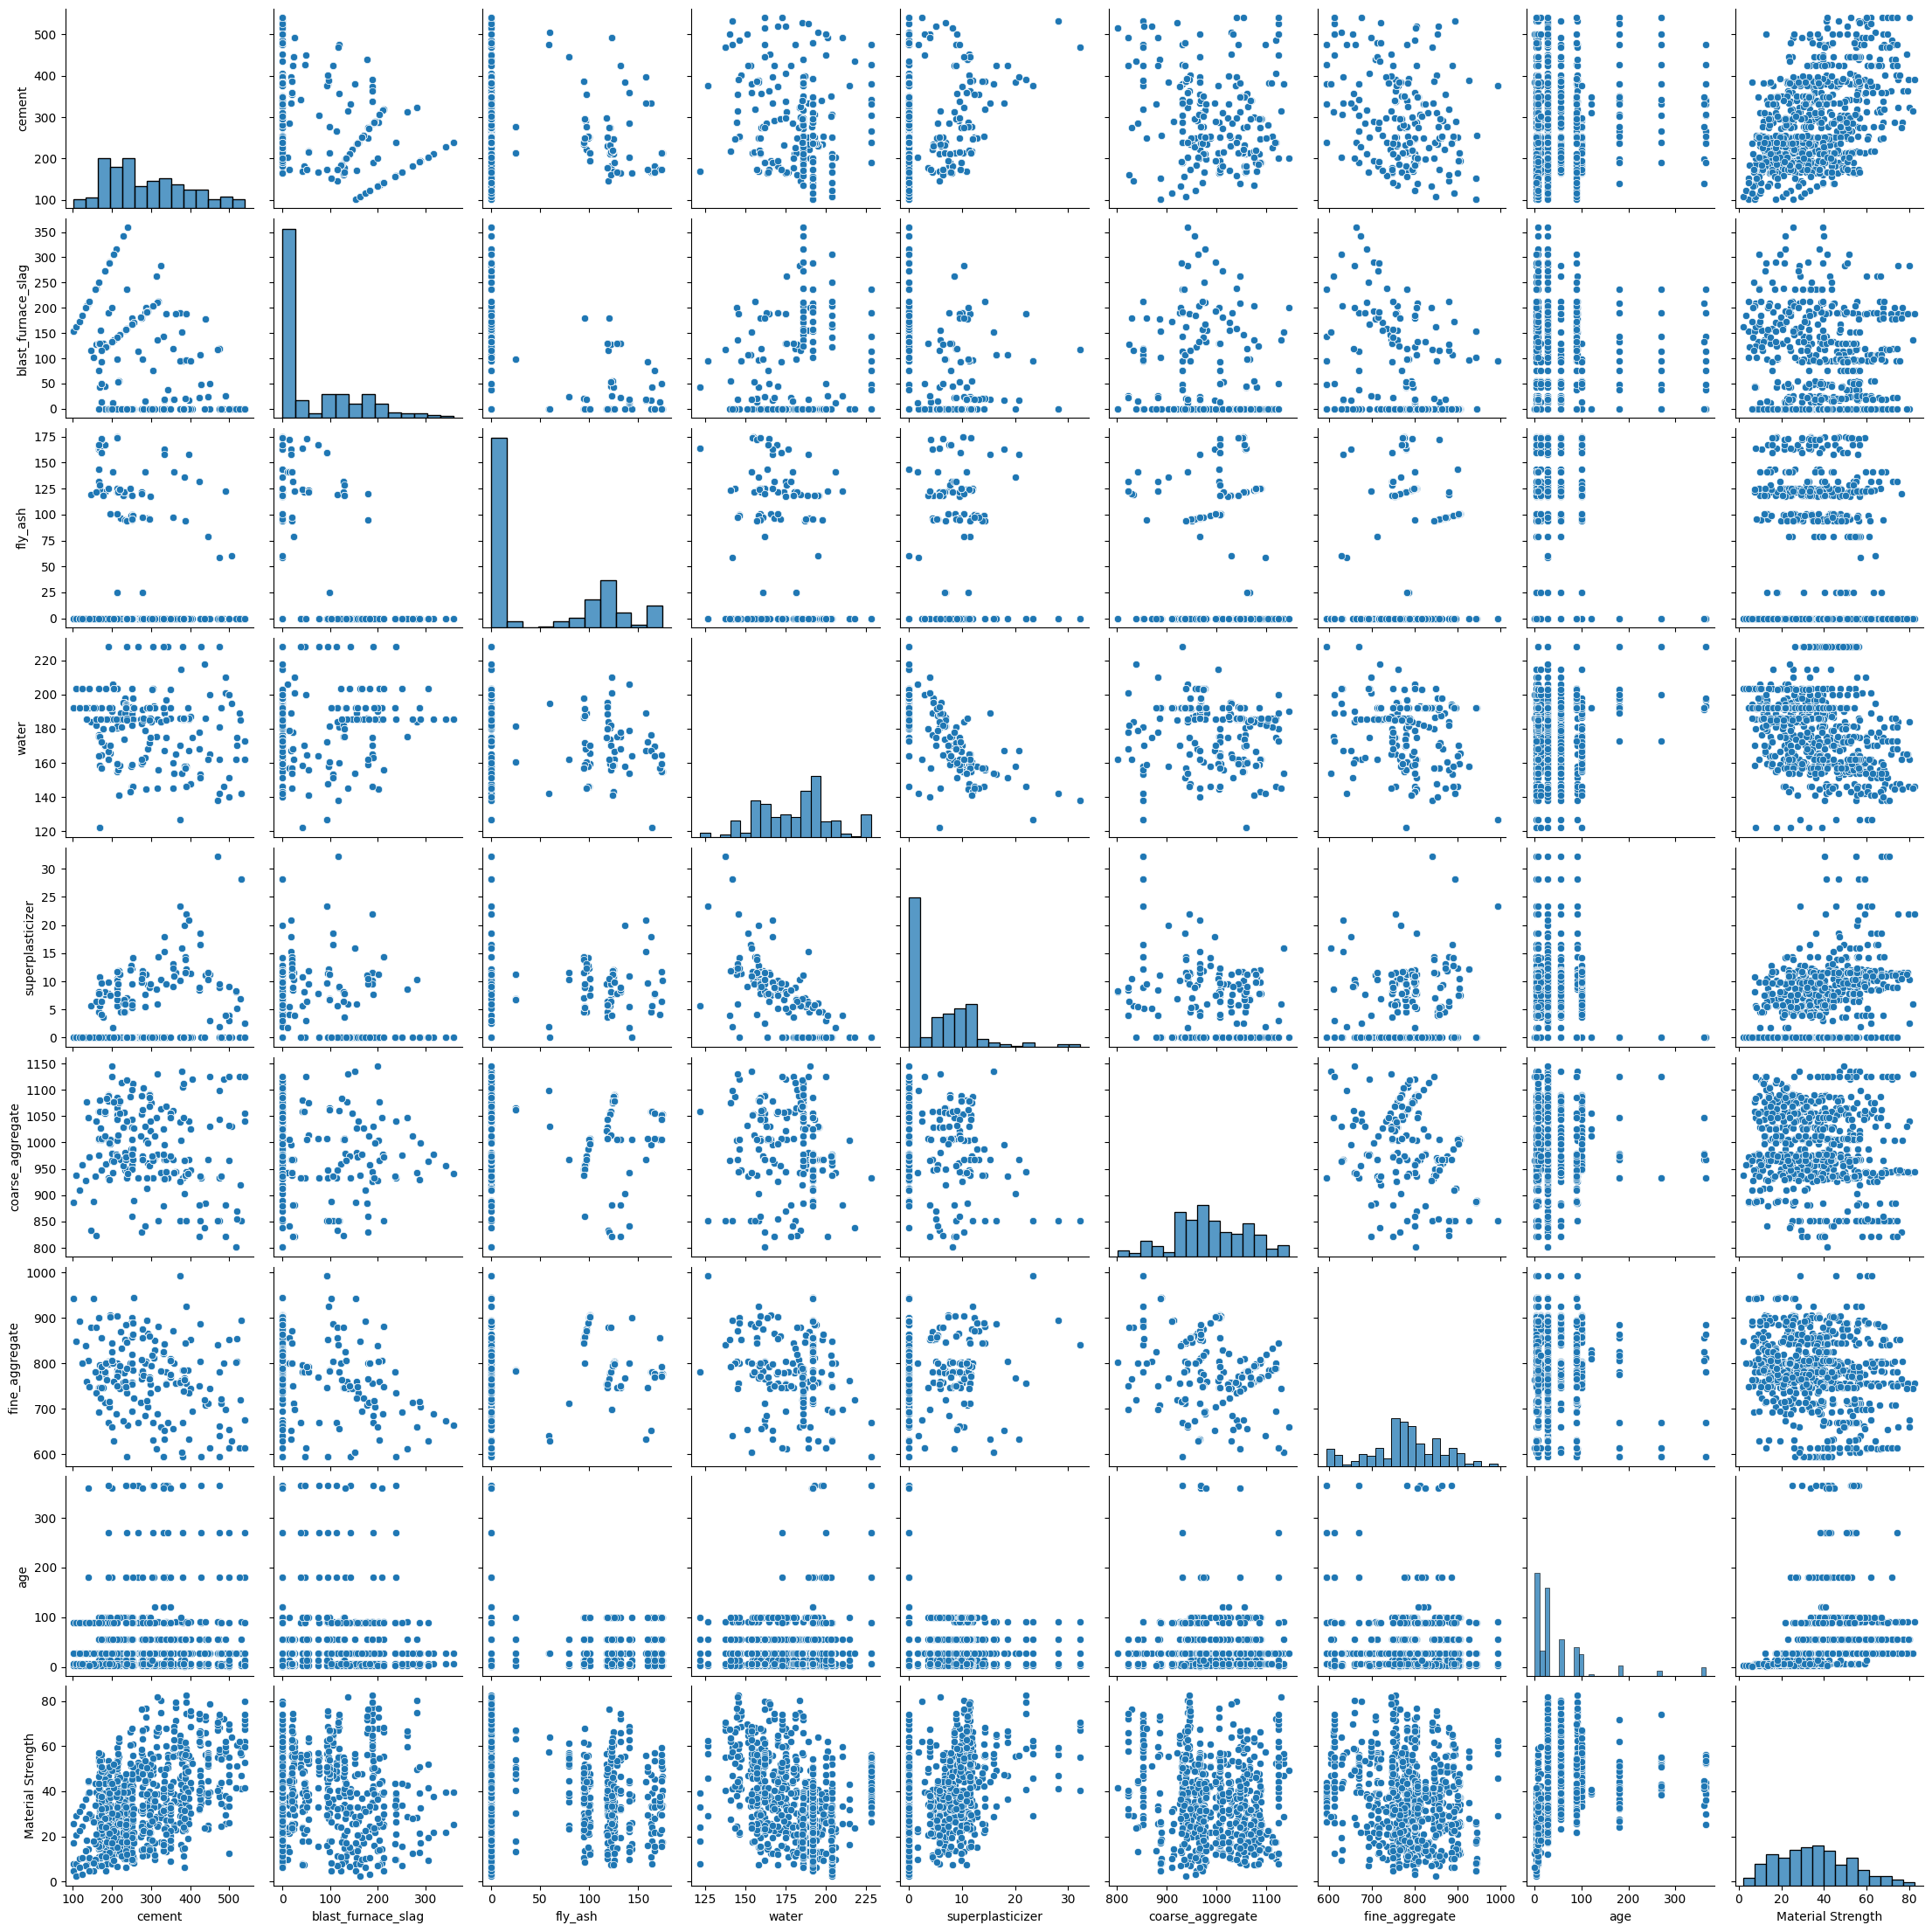

In [161]:
sns.pairplot(train)

We notice the following trends:
- There is a direct relation between Cement and Material Strength.
- There seems to be a relationship between water and superplasticizers too.
- The ages are very discrete, which gives us a possibility that the experiments for this data were conducted in batches with materials of similar ages but different mixture ratio. This gives us a hint that maybe we can form categories of similar age concrete thereby converting these discrete values into categories.

The above pair plot gives us this rough idea but we shall explore this more quantatively using correlations.

In [162]:
train.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
cement,1.000000,-0.239788,-0.330568,-0.025719,0.208781,-0.253011,-0.316229,0.055816,0.460156
blast_furnace_slag,-0.239788,1.000000,-0.401126,0.140495,-0.046215,-0.249512,-0.301671,-0.012374,0.088163
fly_ash,-0.330568,-0.401126,1.000000,-0.433831,0.373638,0.168026,0.194679,-0.148979,0.017349
water,-0.025719,0.140495,-0.433831,1.000000,-0.763071,-0.142042,-0.459311,0.331801,-0.278982
superplasticizer,0.208781,-0.046215,0.373638,-0.763071,1.000000,-0.181905,0.277159,-0.174390,0.447484
coarse_aggregate,-0.253011,-0.249512,0.168026,-0.142042,-0.181905,1.000000,-0.188382,-0.073687,-0.186456
fine_aggregate,-0.316229,-0.301671,0.194679,-0.459311,0.277159,-0.188382,1.000000,-0.197913,-0.208380
age,0.055816,-0.012374,-0.148979,0.331801,-0.174390,-0.073687,-0.197913,1.000000,0.352323
Material Strength,0.460156,0.088163,0.017349,-0.278982,0.447484,-0.186456,-0.208380,0.352323,1.000000


Let us visualise the above using heatmaps so it becomes easier to derive inferences.

Text(0.5, 1.0, "Pearson's Correlation Heatmap")

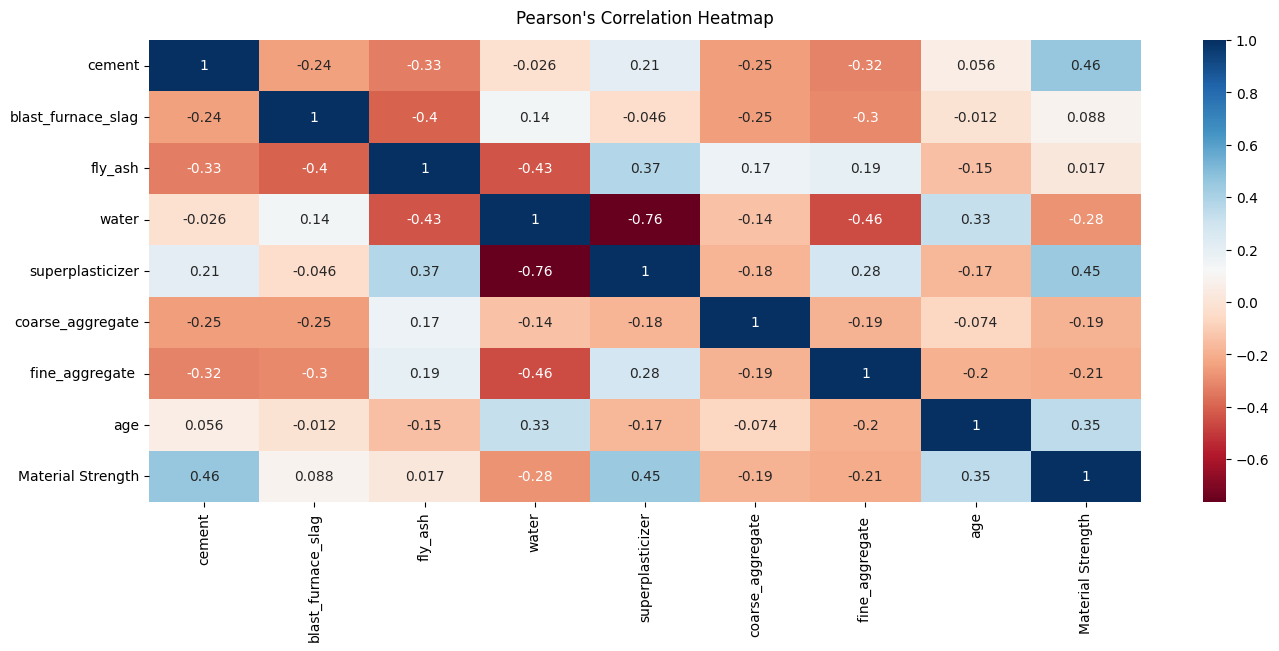

In [163]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.corr(), annot=True, cmap='RdBu')
plt.title("Pearson's Correlation Heatmap", fontdict={'fontsize':12}, pad=12) 

We can clearly notice the following are significantly correlated (>0.4):
- Cement & Material Strength
- blast_furnace_slag & fly_ash
- fly_ash & water
- water & superplasticizer
- water & fine_aggregate

Here is some theory regarding the formation of concrete from various references linked at the very top.

> The ratio in which you add the different components of the concrete together is an incredibly key factor in creating strong or weak concrete. By adding more or less of just one of the raw materials will create a completely different form of concrete, and while different forms of concrete are better utilised in different situations, to create the strongest form of concrete it is advised that you use a ratio of 1:2:3:0.5, 1 part cement, 2 parts sand, 3 parts aggregate, and 0.5 parts water. By adding less water, you are creating a dryer mixture, which means that the concrete will start to solidify and strengthen more quickly, and by adding more cement and less sand, you are providing the mixture with more of the bonding agent to help create a robust finished product.

> Mixes with a low water/ cement ratio gain strength, expressed as a percentage of long-term strength, more rapidly than mixes with higher water/cement ratios. 

![Cement/Water vs Material Strength](./12140060_Aditya_Asg1_strength_vs_cement_water_ratio.png)  

_image source: https://www.civilengineeringforum.me/effect-of-age-on-concrete-strength/_

### Cement and Water Relation

In [164]:
train['cement_water_ratio'] = train['cement']/train['water']
train_cement_water_ratio=train.copy()
test['cement_water_ratio'] = test['cement']/test['water']
# print(train.shape)

correlation = pearsonr(train['cement_water_ratio'],train['Material Strength'])
print(correlation)

PearsonRResult(statistic=0.5318648783715342, pvalue=6.985578236439841e-58)


As we can see, this correlation of this new feature that we added with the Material Strength is the highest so far along with a very low p value. Hence, it is significant.

### Introducing new feature - Age Categories
Now, based upon the theory we have read, there are emphirically various age brackets which influence the material strength. Thus, let us convert the age feature values into categories instead.
This can help us account for any non linear effects.

In [165]:
train['age'].value_counts()

age
28     208
3      126
7      116
56      86
14      60
100     52
90      51
180     24
91      17
365     14
270     12
360      5
120      3
1        2
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

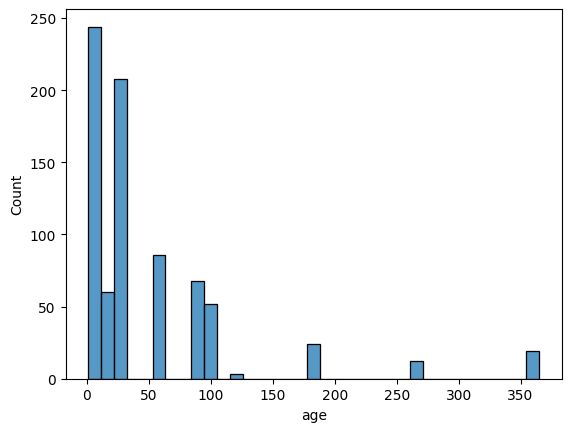

In [166]:
sns.histplot(train['age'])

In [167]:
train['age_bin'] = pd.cut(train['age'], bins=[0, 28, 75, 150, 250, 400], labels=['fresh', '2 months later', '3 months in', 'intermediate', 'old'])

In [168]:
test['age_bin'] = pd.cut(test['age'], bins=[0, 28, 75, 150, 250, 400], labels=['fresh', '2 months later', '3 months in', 'intermediate', 'old'])

Since, we have categorised the `age` column, we now also need to do ordinal encoding so that we may train our model using this data.

In [169]:
label_encoder = LabelEncoder()
train['age_bin'] = label_encoder.fit_transform(train['age_bin'])
test['age_bin'] = label_encoder.fit_transform(test['age_bin'])

### Water and Superplasticizer relation

As we can see, the correlation between the above 2 features is high and negative. Thus, we studied the theoritical relation between the two and citing one of the sources:
> Superplasticizers are powerful water reducers that enable an increase in the ultimate stress of concrete by decreasing the w/c ratio, a decrease in the cement content while maintaining the same range of strength. _(Source : https://www.sciencedirect.com/science/article/abs/pii/S0958946512001369_)

After reading this study, we get the insight to create a new feature but we need to understand whether to combine this with water feature, with cement feature or with the cement_water_ratio feature. We find the correlations for these.

In [170]:
corr1 = pearsonr(train['cement_water_ratio'],train['superplasticizer'])
corr2 = pearsonr(train['cement'],train['superplasticizer'])
corr3 = pearsonr(train['water'],train['superplasticizer'])
print(corr1)
print(corr2)
print(corr3)

PearsonRResult(statistic=0.4837786310670192, pvalue=9.0853120133245e-47)
PearsonRResult(statistic=0.2087813634476063, pvalue=4.320685808668476e-09)
PearsonRResult(statistic=-0.7630714023805858, pvalue=7.209107871889218e-149)


In [171]:
# train['superplasticizer_cement_ratio'] = train['superplasticizer']/train['cement']
# correlation = pearsonr(train['superplasticizer_cement_ratio'],train['Material Strength'])
# print(correlation)

In [172]:
train['superplasticizer_water_ratio'] = train['superplasticizer']/train['water']
train_superplasticizer_water_ratio=train.copy()
correlation = pearsonr(train['superplasticizer_water_ratio'],train['Material Strength'])
print(correlation)

test['superplasticizer_water_ratio'] = test['superplasticizer']/test['water']

PearsonRResult(statistic=0.4389221629214401, pvalue=7.000163576675154e-38)


In [173]:
# train['superplasticizer_ratio_ratio'] = train['superplasticizer']/train['cement_water_ratio']
# correlation = pearsonr(train['superplasticizer_ratio_ratio'],train['Material Strength'])
# print(correlation)

Thus, it we finalise on a new feature, `superplasticizer_water_ratio` as it has a really high correlation with the `Material Strength` along with very low p value.

In [174]:
train.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,cement_water_ratio,age_bin,superplasticizer_water_ratio
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,289.562500,65.136985,49.289948,180.386340,5.447680,988.008634,777.434021,50.050258,35.924188,1.634297,1.730670,0.034142
std,103.764355,85.653577,61.897938,22.232729,6.185539,72.079540,82.966435,69.931515,17.165696,0.644152,0.849068,0.041620
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.531250,0.000000,0.000000
25%,212.000000,0.000000,0.000000,162.000000,0.000000,938.200000,745.000000,7.000000,22.817500,1.175725,1.000000,0.000000
50%,275.000000,13.600000,0.000000,185.700000,4.550000,977.300000,780.700000,28.000000,34.835000,1.500246,2.000000,0.025496
75%,365.450000,128.125000,118.225000,192.000000,9.900000,1047.000000,834.550000,56.000000,47.710000,2.016129,2.000000,0.059424
max,540.000000,359.400000,174.700000,228.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,3.746827,4.000000,0.233672


In [175]:
columns_to_drop = ['age']
train = train.drop(columns_to_drop, axis=1)
train_superplasticizer_water_ratio = train_superplasticizer_water_ratio.drop(['cement_water_ratio'], axis=1)
test = test.drop(columns_to_drop, axis=1)

In [176]:
train.describe()
cols = list(train.columns.values)
print(cols)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'Material Strength', 'cement_water_ratio', 'age_bin', 'superplasticizer_water_ratio']


In [177]:
# Renaming and Rearranging the columns

train=train[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'cement_water_ratio', 'age_bin', 'superplasticizer_water_ratio', 'Material Strength']]
test=test.rename(columns={'material_strength':'Material Strength'})
test=test[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'cement_water_ratio', 'age_bin', 'superplasticizer_water_ratio', 'Material Strength']]
train_cement_water_ratio=train_cement_water_ratio[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'cement_water_ratio', 'age', 'Material Strength']]
train_superplasticizer_water_ratio=train_superplasticizer_water_ratio[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age_bin', 'superplasticizer_water_ratio', 'Material Strength']]

In [178]:
# Creating different dataframes for different models for experimentation purposes

feature_train=train[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'cement_water_ratio', 'age_bin', 'superplasticizer_water_ratio']]
target_train=train[['Material Strength']]

feature_train_org=train_org[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']]
target_train_org=train_org[['Material Strength']]

feature_train_cement_water_ratio=train_cement_water_ratio[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ','cement_water_ratio','age']]
target_train_cement_water_ratio=train_cement_water_ratio[['Material Strength']]

feature_train_superplasticizer_water_ratio=train_superplasticizer_water_ratio[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age_bin', 'superplasticizer_water_ratio']]
target_train_org=train_superplasticizer_water_ratio[['Material Strength']]

feature_test=test[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age_bin']]
target_test=test[['Material Strength']]

In [179]:
target_train_org=train_org[['Material Strength']]

Now, that we have 4 different training datasets with different features as the columns, we shall now experiment, find the maximum R-squared and then proceed with that dataset. Here is a synopsis of the datasets:
- `feature_train_org` contains just the original features.
- `feature_train_cement_water_ratio` contains original features + `cement-water_ratio`
- `feature_train_superplasticizer_water_ratio` contains original features - `age` + `age_bin` + `superplasticizer_water_ratio` 
- `feature_train` contains original features - `age` + `age_bin` + `superplasticizer_water_ratio` + `cement_water_ratio`

We use K-fold approach to measure the performance due to various datasets on the same model.

In [180]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

data_sets=[feature_train,  feature_train_superplasticizer_water_ratio]
target_sets=[target_train,  target_train]
r2_scores=[]

for i in range(len(data_sets)):
    model = LinearRegression()
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)
    cv_scores = cross_val_score(model, data_sets[i], target_sets[i], cv=kf, scoring='r2')

    avg_r2 = cv_scores.mean()
    r2_scores.append(avg_r2)

print(r2_scores)



[0.4355122011531146, 0.44039491273553366]


After trying out these combinations of various training sets with different features, we come to the conclusion that the training set `train_superplasticizer_water_ratio` gives us the best R-squared score.
Hence, we shall proceed with that training set.

Let us first rename it to simplify things. We do this by creating a shallow copy.

In [181]:
feature_training_set=feature_train_superplasticizer_water_ratio
target_training_set=target_train

### Creating the Validation Set

We shall run a for loop to find that value of `random_state` wherein we are obtaining the highest score.

In [182]:
from sklearn.model_selection import train_test_split

modelLR=LinearRegression()
rs=[]
score=[]
for i in range(1,200,1):
    X_train, X_test, y_train, y_test = train_test_split(feature_training_set, target_training_set,test_size=0.1,random_state=i)
    modelLR.fit(X_train,y_train)
    score.append(modelLR.score(X_test,y_test))
    rs.append(i)

for i in range(len(rs)):
    print(rs[i],score[i])

1 0.30847751016595615
2 0.5640081001416227
3 0.3872959206400849
4 0.41000269935828015
5 0.33968306619577393
6 0.5266865255322866
7 0.3782123124326323
8 0.3903194730816244
9 0.3983565116002611
10 0.5299606377804582
11 0.3760572034281836
12 0.32206195963863815
13 0.45953078399722924
14 0.5487343512516115
15 0.48169403558747037
16 0.44529749555002696
17 0.4248429423102842
18 0.47355172178020843
19 0.48385518766177116
20 0.3951878079245579
21 0.5343656326667381
22 0.47533823761391447
23 0.6015201981438927
24 0.4875205769654293
25 0.4539673016808289
26 0.35142546850376266
27 0.47207501933460716
28 0.47040528498478273
29 0.4087231043849998
30 0.3718384341062805
31 0.42465177436158064
32 0.4172124370584749
33 0.45456374700823665
34 0.44578382959149365
35 0.4108961627277109
36 0.5897184193273763
37 0.270176358610269
38 0.4497515297921829
39 0.44209798869517136
40 0.5910821518355327
41 0.4886152024422469
42 0.2743139532082235
43 0.519312740855302
44 0.389055529027469
45 0.36984422279754525
46 0

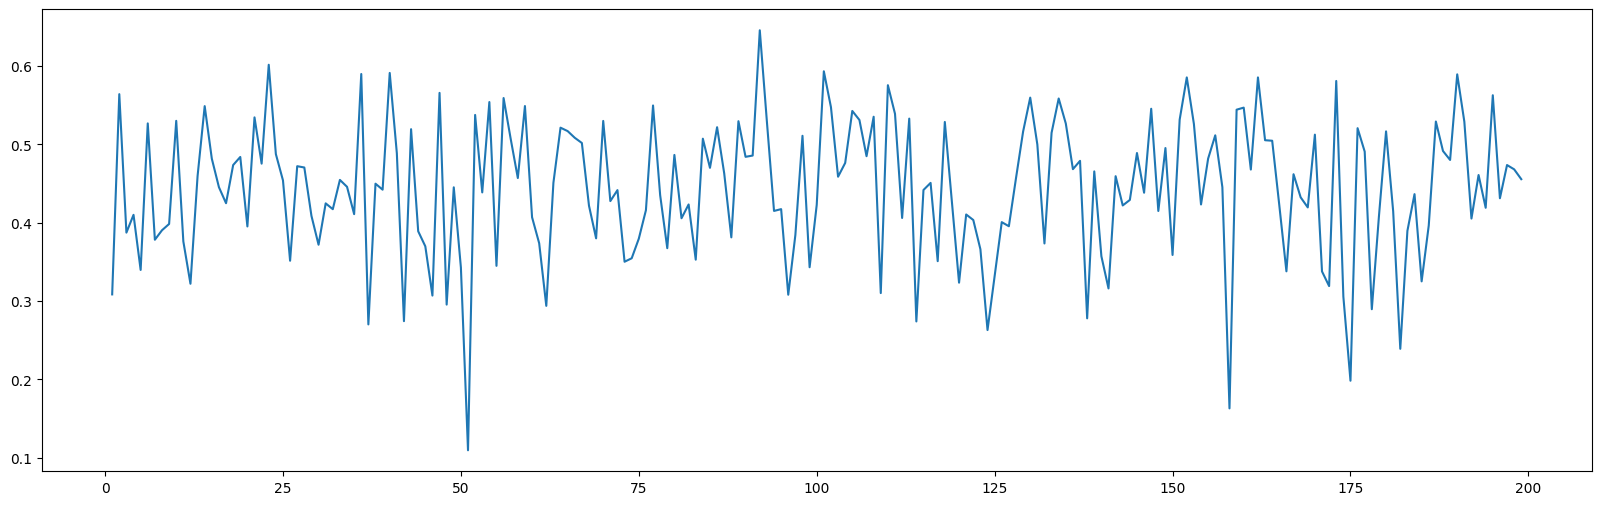

In [183]:
plt.figure(figsize=(20,6))
plt.plot(rs,score)

Now, after inspecting the plot and the printed data, we find the highest score at random seed of value 92. Hence, we shall proceed with that value while splitting the data into test and validation sets. We shall also keep the validation set size as 10% of the training set size as we are already low on the size of training data set.

In [184]:
X_train, X_test, y_train, y_test = train_test_split(feature_training_set, target_training_set, test_size=0.1, random_state=92)

In [185]:
X_train= np.delete(X_train, 8, axis=1)
X_test=np.delete(X_test, 8, axis=1)

### Scaling of the Data

Before we proceed any further, we shall scale up our training, validation and test data using the quantile transformer. The reason why we choose this scaler because it is useful when we want to transform features to have a uniform or Gaussian distribution. It's robust to outliers and can help make the data conform to a Gaussian distribution.

In [186]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
X_train = quantile_transformer.fit_transform(X_train)

X_test = quantile_transformer.transform(X_test)
feature_test = quantile_transformer.transform(feature_test)

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but QuantileTransformer was fitted without feature names
  warnings.warn(


# Phase 2- Exact Solution

Now that we have cleaned the entire data, created and/or removed some features as we deemed necessary and create the test and validation sets, we shall now be solving this Linear Regression model to find the optimal weights and then testing whether these weights are leading to high accuracy on the validation set too.
We shall be using 2 methods to find these weights:
- Normal Equations
- Psuedo Inverse

In [187]:
X_train_augmented = np.column_stack((np.ones(X_train.shape[0]), X_train))

### Solving using Normal Equations

In [188]:
normal_weights=np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train
print("The weight parameters as calculated from Normal Equations are as follows:")
print(normal_weights)

The weight parameters as calculated from Normal Equations are as follows:
   Material Strength
0          54.769467
1          16.899812
2           1.866145
3          -4.654373
4         -14.012652
5          10.451787
6          -8.964106
7         -18.193477
8         -20.230545


### Solving using Pseudo Inverse Method

In [189]:
psuedo_inverse_weights=np.linalg.pinv(X_train_augmented) @ y_train
print("The weight parameters as calculated from Pseudo Inverse Equations are as follows:")
print(psuedo_inverse_weights)

The weight parameters as calculated from Pseudo Inverse Equations are as follows:
   Material Strength
0          54.769467
1          16.899812
2           1.866145
3          -4.654373
4         -14.012652
5          10.451787
6          -8.964106
7         -18.193477
8         -20.230545


The interpretation of this model and these weights is that the higher the absolute value of any weight, more "important" that variable or feature is. 

Firstly, 54 is the intercept or the bias which was generated because we had augmented the matrix with a column of 1's.
Next, we have the weights of different features like the weight of the feature `cement` is 16.89 and so on.  
However, we notice that the weight of `superplasticizer_water_ratio` is coming out to be -20.230545 . There is a very significant chance that this weight has overfit the data and hence I am tempted to apply some regularization technique to ensure weights do not get a very high value.

Thus, the equation for Linear Regression is:  
![Alt text](12140060_Aditya_Asg1_Image2.png)

As we can see, the weights/parameter values are coming out as same using both the approaches. Now, we find how accurate this model is on the validation set.

In [190]:
from sklearn.metrics import mean_squared_error,r2_score

X_test_augmented = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = X_test_augmented @ normal_weights
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE) on Validation Set:", rmse)
print("R-squared Score on Validation Set:", r2)

Root Mean Square Error (RMSE) on Validation Set: 10.879853213091
R-squared Score on Validation Set: 0.6506667931770171


# Phase 3- Statistical Analysis

We shall be using the OLS techniques for this phase. Ordinary least squares (OLS) regression is a technique that enables us to discover a line that most accurately represents the association between one or more independent variables and a dependent variable.  
This is a part of `statsmodel` library in python.

In [191]:
import statsmodels.api as sm

In [192]:
ols_model = sm.OLS(y_train, X_train_augmented).fit()
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     82.09
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           5.61e-95
Time:                        18:35:34   Log-Likelihood:                -2734.7
No. Observations:                 698   AIC:                             5487.
Df Residuals:                     689   BIC:                             5528.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7695      5.844      9.372      0.0

As we can see the p-values for the `x2` variables was very large (>0.05), we consider it to be insignificant and thus, we can safely remove this feature.

In [193]:
# We have removed this feature above.

X_train_model2= np.delete(X_train, 2, axis=1)
X_train_model2_augmented = np.column_stack((np.ones(X_train_model2.shape[0]), X_train_model2))

X_test_model2=np.delete(X_test, 2, axis=1)
X_test_model2_augmented = np.hstack((np.ones((X_test_model2.shape[0], 1)), X_test_model2))

In [194]:
ols_model_2 = sm.OLS(y_train, X_train_model2_augmented).fit()
summary = ols_model_2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     92.78
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           4.59e-95
Time:                        18:35:34   Log-Likelihood:                -2736.9
No. Observations:                 698   AIC:                             5490.
Df Residuals:                     690   BIC:                             5526.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6727      5.308      9.357      0.0

We observe that the F statistic as well as R-squared for the old model is higher than the previous one and hence using the OLS statistical analysis, we have found the better model after comparing them.  

All the features other than the one we dropped (`super_plasticizer_ratio`) are significant as they either have a very low p value or a high z statistics.
Now, in order to find the confidence intervals of these features, we do the following: 

In [195]:
confidence_intervals = ols_model.conf_int()
print(confidence_intervals)

               0          1
const  43.295043  66.243890
x1     11.031859  22.767765
x2     -2.355247   6.087538
x3     -9.085275  -0.223471
x4    -20.585954  -7.439349
x5      4.934456  15.969119
x6    -13.964073  -3.964140
x7    -23.455506 -12.931448
x8    -24.048643 -16.412447


The interpretation for the above is that with a certain level of confidence (usually 95% by default), the true population of a feature is expected to fall within this range which is printed in the format of lower_bound and upper_bound. A narrower confidence interval indicates a higher level of confidence in the coefficient estimate, while a wider interval implies more uncertainty.

Now, we shall experiment with another model namely Decision Tree Regressor and find out various statistics regarding it. 

In [196]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

regressor = DecisionTreeRegressor(random_state=0)
#No need for augmented matrices in this case. The library takes care of it.
regressor.fit(X_train, y_train)
y_pred_dtr = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2 = r2_score(y_test, y_pred_dtr)

print("Root Mean Square Error (RMSE) on Validation Set:", rmse)
print("R-squared Score on Validation Set:", r2)


Root Mean Square Error (RMSE) on Validation Set: 11.928269220893926
R-squared Score on Validation Set: 0.580097303393861


As we can observe, in the Decision Tree Regressor model that we have trained, the above are the "importance" of various features and then R-squared value is coming out to be 0.57998 which is lower than the R-squared we got in the case of our Linear Regression Model. The RMSE is also higher in this case.

In [197]:
feature_importance = regressor.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.25063256 0.02867428 0.03154032 0.06962479 0.140567   0.04870258
 0.15840052 0.27185794]


# Phase 4- Gradient Descent

The reference for this phase is https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f .

Gradient Descent is an iterative optimisation problem used to find the optimal value of weights/parameters. Here are the steps involved in layman terms. We shall dive deep into each step once we start implementing it.
- First begin with a randomised initialised value.
- Use these values to predict the value of the target.
- Now calculate the error or the cost by taking the difference between the predicted value and the actual value of the target.
- Update the parameters by a delta in order to ensure the cost is reduced.
- Loop until the cost is within a tolerable limit.

In [198]:
gd_y_train=y_train.copy()
gd_X_train=X_train_augmented.copy()
gd_X_test=X_test_augmented.copy()
gd_y_test=y_test.copy()

num_iterations = 1000

learning_rates = [0.1,0.001,0.00001,0.0000001]

gd_thetas = np.random.rand(9, 1)
gd_val_thetas = np.random.rand(9, 1)

theta_history = []
theta_val_history = []
gd_cost_history = []
gd_val_cost_history=[]
m=gd_X_train.shape[0]


In [199]:
for learning_rate in learning_rates:

    for iteration in range(num_iterations):

        gradients = 2/m * gd_X_train.T.dot(gd_X_train.dot(gd_thetas) - gd_y_train)
        gd_thetas -= learning_rate * gradients
        theta_history.append(gd_thetas.copy())

        val_gradients = 2/m * gd_X_test.T.dot(gd_X_test.dot(gd_val_thetas) - gd_y_test)
        gd_val_thetas -= learning_rate * val_gradients
        theta_val_history.append(gd_val_thetas.copy())

        gd_mse = np.mean((gd_X_train.dot(gd_thetas) - gd_y_train) ** 2)
        gd_cost_history.append(gd_mse)
        gd_val_mse = np.mean((gd_X_test.dot(gd_val_thetas) - gd_y_test) ** 2)
        gd_val_cost_history.append(gd_val_mse)

        

# print(len(cost_history))


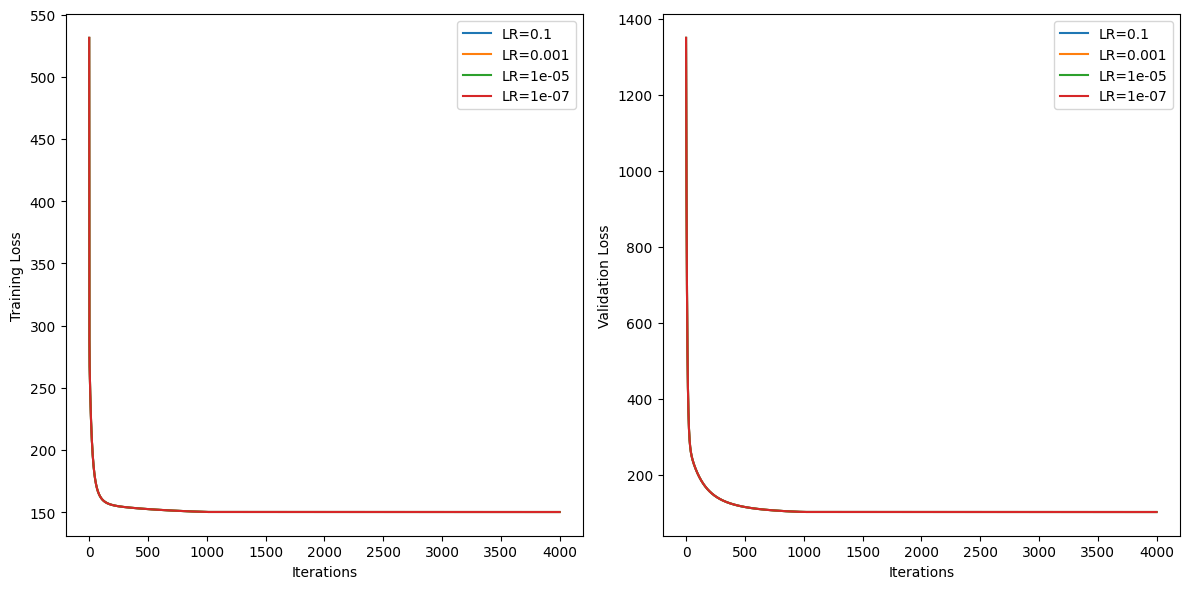

In [200]:
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.subplot(1, 2, 1)
    plt.plot(gd_cost_history, label=f"LR={lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(gd_val_cost_history, label=f"LR={lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Loss")  
    plt.legend()

plt.tight_layout()
plt.show()

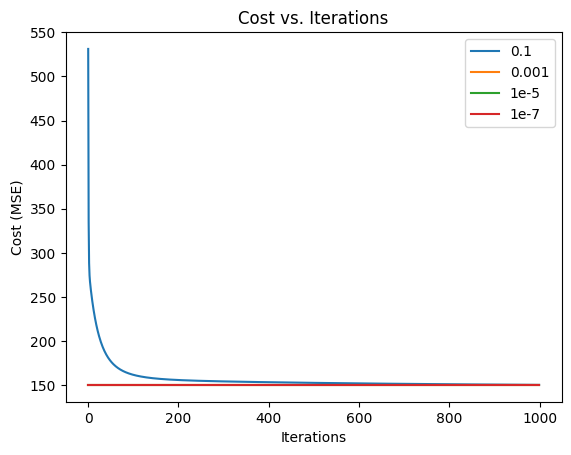

In [201]:
x_data1 = range(num_iterations)
y_data1 = gd_cost_history[0:1000]  
label1 = '0.1'

x_data2 = range(num_iterations)
y_data2 = gd_cost_history[1000:2000] 
label2 = '0.001'

x_data3 = range(num_iterations)
y_data3 = gd_cost_history[2000:3000]  
label3 = '1e-5'

x_data4 = range(num_iterations)
y_data4 = gd_cost_history[3000:4000]  
label4 = '1e-7'

plt.plot(x_data1, y_data1, label=label1)
plt.plot(x_data2, y_data2, label=label2)
plt.plot(x_data3, y_data3, label=label3)
plt.plot(x_data4, y_data4, label=label4)

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs. Iterations')
plt.legend()

# Show the plot
plt.show()

We can see the convergence of all these `costs` given sufficient number of iterations at various learning rates.

Hence, the optimal gradient descent learning rate for this data set is `1e-7`.  
Now we need to find the convergence criterion so that we may stop the gradient descent algorithm once it has nearly converged, hence saving resources and time.  
The strategy we utilise is to set a tolerance and if the difference of `cost` between two iterations is below this tolerance, we consider that our algorithm has converged and we can break and not perform the further iterations.

In [202]:
num_iterations=1000
learning_rate = 1e-7
tolerance=1e-8
gd_cost_history.clear()
theta_history.clear()
prev_cost=float('inf')

for iteration in range(num_iterations):

    gd_gradients = 2/m * gd_X_train.T.dot(gd_X_train.dot(gd_thetas) - gd_y_train)
    gd_thetas -= learning_rate * gd_gradients
    theta_history.append(gd_thetas.copy())

    gd_mse = np.mean((gd_X_train.dot(gd_thetas) - gd_y_train) ** 2)
    gd_cost_history.append(gd_mse)

    if (abs(prev_cost-gd_mse)<tolerance):
        print(f"Converged at iteration {len(gd_cost_history)}.")
        break

    prev_cost=gd_mse
    theta_history.append(gd_thetas.copy())

# print(len(gd_cost_history))

Converged at iteration 2.


As we can see, it has converged at iteration 2 itself. We can experiment more by varying the tolerance values.

# Phase 5- KNN Approach

KNN is a non parametric approach and is generally used in classifiers however, it is also sometimes used in regression models. We shall experiment with all the odd values between 1 to 21 because having an odd value eliminates the chance of a tie.

The reference for this Phase is: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [203]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

k_values = range(1, 21, 2)
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

print(mse_values)

[175.47738846153848, 104.58017706552707, 87.79414953846153, 94.11893982208268, 87.78278421968979, 86.3484385992795, 91.63008220300412, 90.662197031339, 98.37223849702778, 101.346142843952]


Let us visualise the MSE values along with the varying K values.

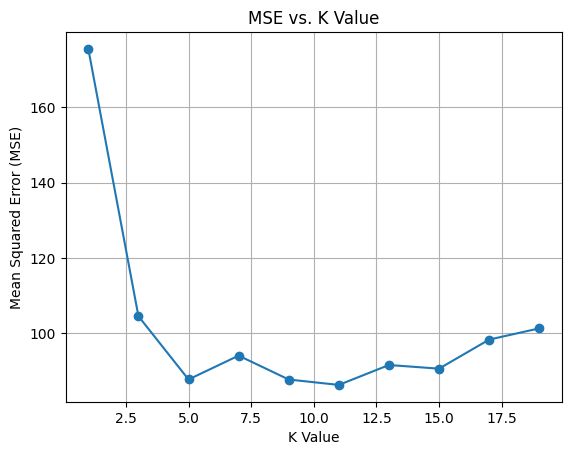

In [204]:
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. K Value')
plt.grid(True)
plt.show()

We can clearly observe that the least MSE is coming when `K = 11` and thus we proceed with that.

In [205]:
optimal_k = k_values[np.argmin(mse_values)]
# print(optimal_k)

final_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
final_knn_regressor.fit(X_train, y_train)

y_pred = final_knn_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_val=r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2_val)


Root Mean Squared Error (RMSE): 9.292386055221742
R-squared Score: 0.7451713301312524


The above R-squared score is MORE than the one we obtained in the Linear Regression Model in Phase 2 on the validation set.   
- KNN R-squared=0.74517    
- Linear Regression R-squared=0.64304

Hence, for this data-set, the non-parametric (KNN) approach is giving us a better performance rather than the parametric approach.

**Pros of K-Nearest Neighbors (KNN):**

1. Simplicity: Easy to understand and implement.
2. No Assumptions: Works with various data distributions.
3. Adaptability: Suitable for classification and regression.
4. Robust to Outliers: Outliers have limited influence.

**Cons of K-Nearest Neighbors (KNN):**

1. Computational Complexity: Can be slow on large datasets.
2. Choice of K: Selection of K is crucial and problem-specific.
3. Memory Usage: Requires storing the entire dataset.

# Phase 6- Building Generalized Linear Models

Reference text for this phase:
- https://online.stat.psu.edu/stat504/lesson/6/6.1
- https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

### GLM 1: Gamma distribution with log link function

I noticed that the Material Strength of the concrete is positively skewed (aligned towards the left). After looking into several distributions and keeping in mind that the Material Strength needs to be always positive, the first GLM is **Gamma distribution with log link function**

In [206]:
import statsmodels.api as sm

# Assuming you have your data loaded as X and y
gamma_model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log()))
gamma_results = gamma_model.fit()

y_pred = gamma_results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_val=r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2_val)

print(gamma_results.summary())

Root Mean Squared Error (RMSE): 20.49766018460981
R-squared Score: -0.2399448711579346
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  698
Model:                            GLM   Df Residuals:                      690
Model Family:                   Gamma   Df Model:                            7
Link Function:                    Log   Scale:                         0.25985
Method:                          IRLS   Log-Likelihood:                -2947.3
Date:                Tue, 05 Sep 2023   Deviance:                       185.83
Time:                        18:35:41   Pearson chi2:                     179.
No. Iterations:                    22   Pseudo R-squ. (CS):            0.03719
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

All the p-values here are significant (<0.05) and also the absolute of z values is high for all the features.

### GLM 2: Gaussian (Normal Distribution) with Identity Link Function

Assuming that the target variable is normally distributed and to ensure a direct relationship between the features and the target variable, we use Gaussian Regression with the Identity Link Function

In [207]:
import statsmodels.api as sm

# Assuming you have your data loaded as X and y
gaussian_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian(link=sm.families.links.Identity()))
gaussian_results = gaussian_model.fit()
gaussian_predictions = gaussian_results.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, gaussian_predictions))
r2_val=r2_score(y_test, gaussian_predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2_val)

print(gaussian_results.summary())


Root Mean Squared Error (RMSE): 10.526067691514582
R-squared Score: 0.6730162910686457
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  698
Model:                            GLM   Df Residuals:                      690
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                          168.93
Method:                          IRLS   Log-Likelihood:                -2776.6
Date:                Tue, 05 Sep 2023   Deviance:                   1.1657e+05
Time:                        18:35:41   Pearson chi2:                 1.17e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5152
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

Using this GLM, we get almost all the features as significant however, the feature x7 which is has a p-value>5% and a low z value. It can be considered insignificant with regards to this model.

### GLM 3: Tweedie Model with Log Link Function

The Tweedie distribution is often used for modeling data with positive values and varying levels of right-skewness. The log link function ensures that the predicted values are positive. Here is the code for the same.

In [208]:
import statsmodels.api as sm

tweedie_model = sm.GLM(y_train, X_train, family=sm.families.Tweedie(link=sm.families.links.Log()))
tweedie_results = tweedie_model.fit()
tweedie_predictions = tweedie_results.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, tweedie_predictions))
r2_val=r2_score(y_test, tweedie_predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2_val)

print(tweedie_results.summary())


Root Mean Squared Error (RMSE): 15.08098005485308
R-squared Score: 0.32879848254141986
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  698
Model:                            GLM   Df Residuals:                      690
Model Family:                 Tweedie   Df Model:                            7
Link Function:                    Log   Scale:                          9.0571
Method:                          IRLS   Log-Likelihood:                -528.09
Date:                Tue, 05 Sep 2023   Deviance:                       5874.9
Time:                        18:35:41   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):          -0.002656
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

Upon observing, we can clearly see that all the p values of the features are less than 5% and hence all features are deemed important for this model.

# Phase 7- Predicting the Test Output

Finally, we shall now be using our models along with the cleaned data and other observations to predict the output (Material Strength) in the test data. The models we have trained so far along with the MSE and R-squared values are as follows:

| Model | RMSE | R-squared |
| ------- | ------- | ------- |
| Linear Regressor  | 10.998 | 0.6430 |
| Decision Tree Regressor  | 11.928 | 0.5801 |
| KNN  | 9.2923 | 0.7452 |
| Gamma GLM  | 20.4976 | -0.2399 |
| Gaussian GLM  | 10.5260 | 0.6730 |
| Tweedie GLM  | 15.0809 | 0.3287 |

Out of the above, KNN has the highest R-squared, it's RMSE is also the least. Hence, we shall go with **KNN** model.

Now that we have selected the model, we need to train it on the entire dataset (training+validation).

In [209]:
train_fin=train.drop(['superplasticizer_water_ratio','cement_water_ratio'], axis=1)
# print(train_fin.columns)

In [210]:
feature_train_fin=train_fin[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age_bin']]
target_train_fin=train_fin[['Material Strength']]

In [211]:
optimal_k = 11

final_knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k)
final_knn_regressor.fit(feature_train_fin, target_train_fin)

y_pred_fin = final_knn_regressor.predict(feature_test)
# type(y_pred_fin)

c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [212]:
y_pred_fin=pd.DataFrame(data=y_pred_fin, columns=['Material Strength'])
y_pred_fin.to_csv('test_predictions.csv', index=False, header=False)